<a href="https://colab.research.google.com/github/oreilly-japan/ml-at-work/blob/master/chap11/01_bandit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![表紙](https://www.oreilly.co.jp/books/images/picture978-4-87311-947-2.gif)

このノートブックはオライリー・ジャパンより発行の書籍[『仕事ではじめる機械学習 第2版』](https://www.oreilly.co.jp/books/9784873119472/)のサンプルコードです。コードの解説等は書籍をご参照ください。なお、このコードを動作させた結果について、著者およびオライリー・ジャパンは一切の責任を負いません。

# 11章：バンディットアルゴリズムによる強化学習入門

In [1]:
import math
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import japanize_matplotlib

## 11.2確率分布の考え方

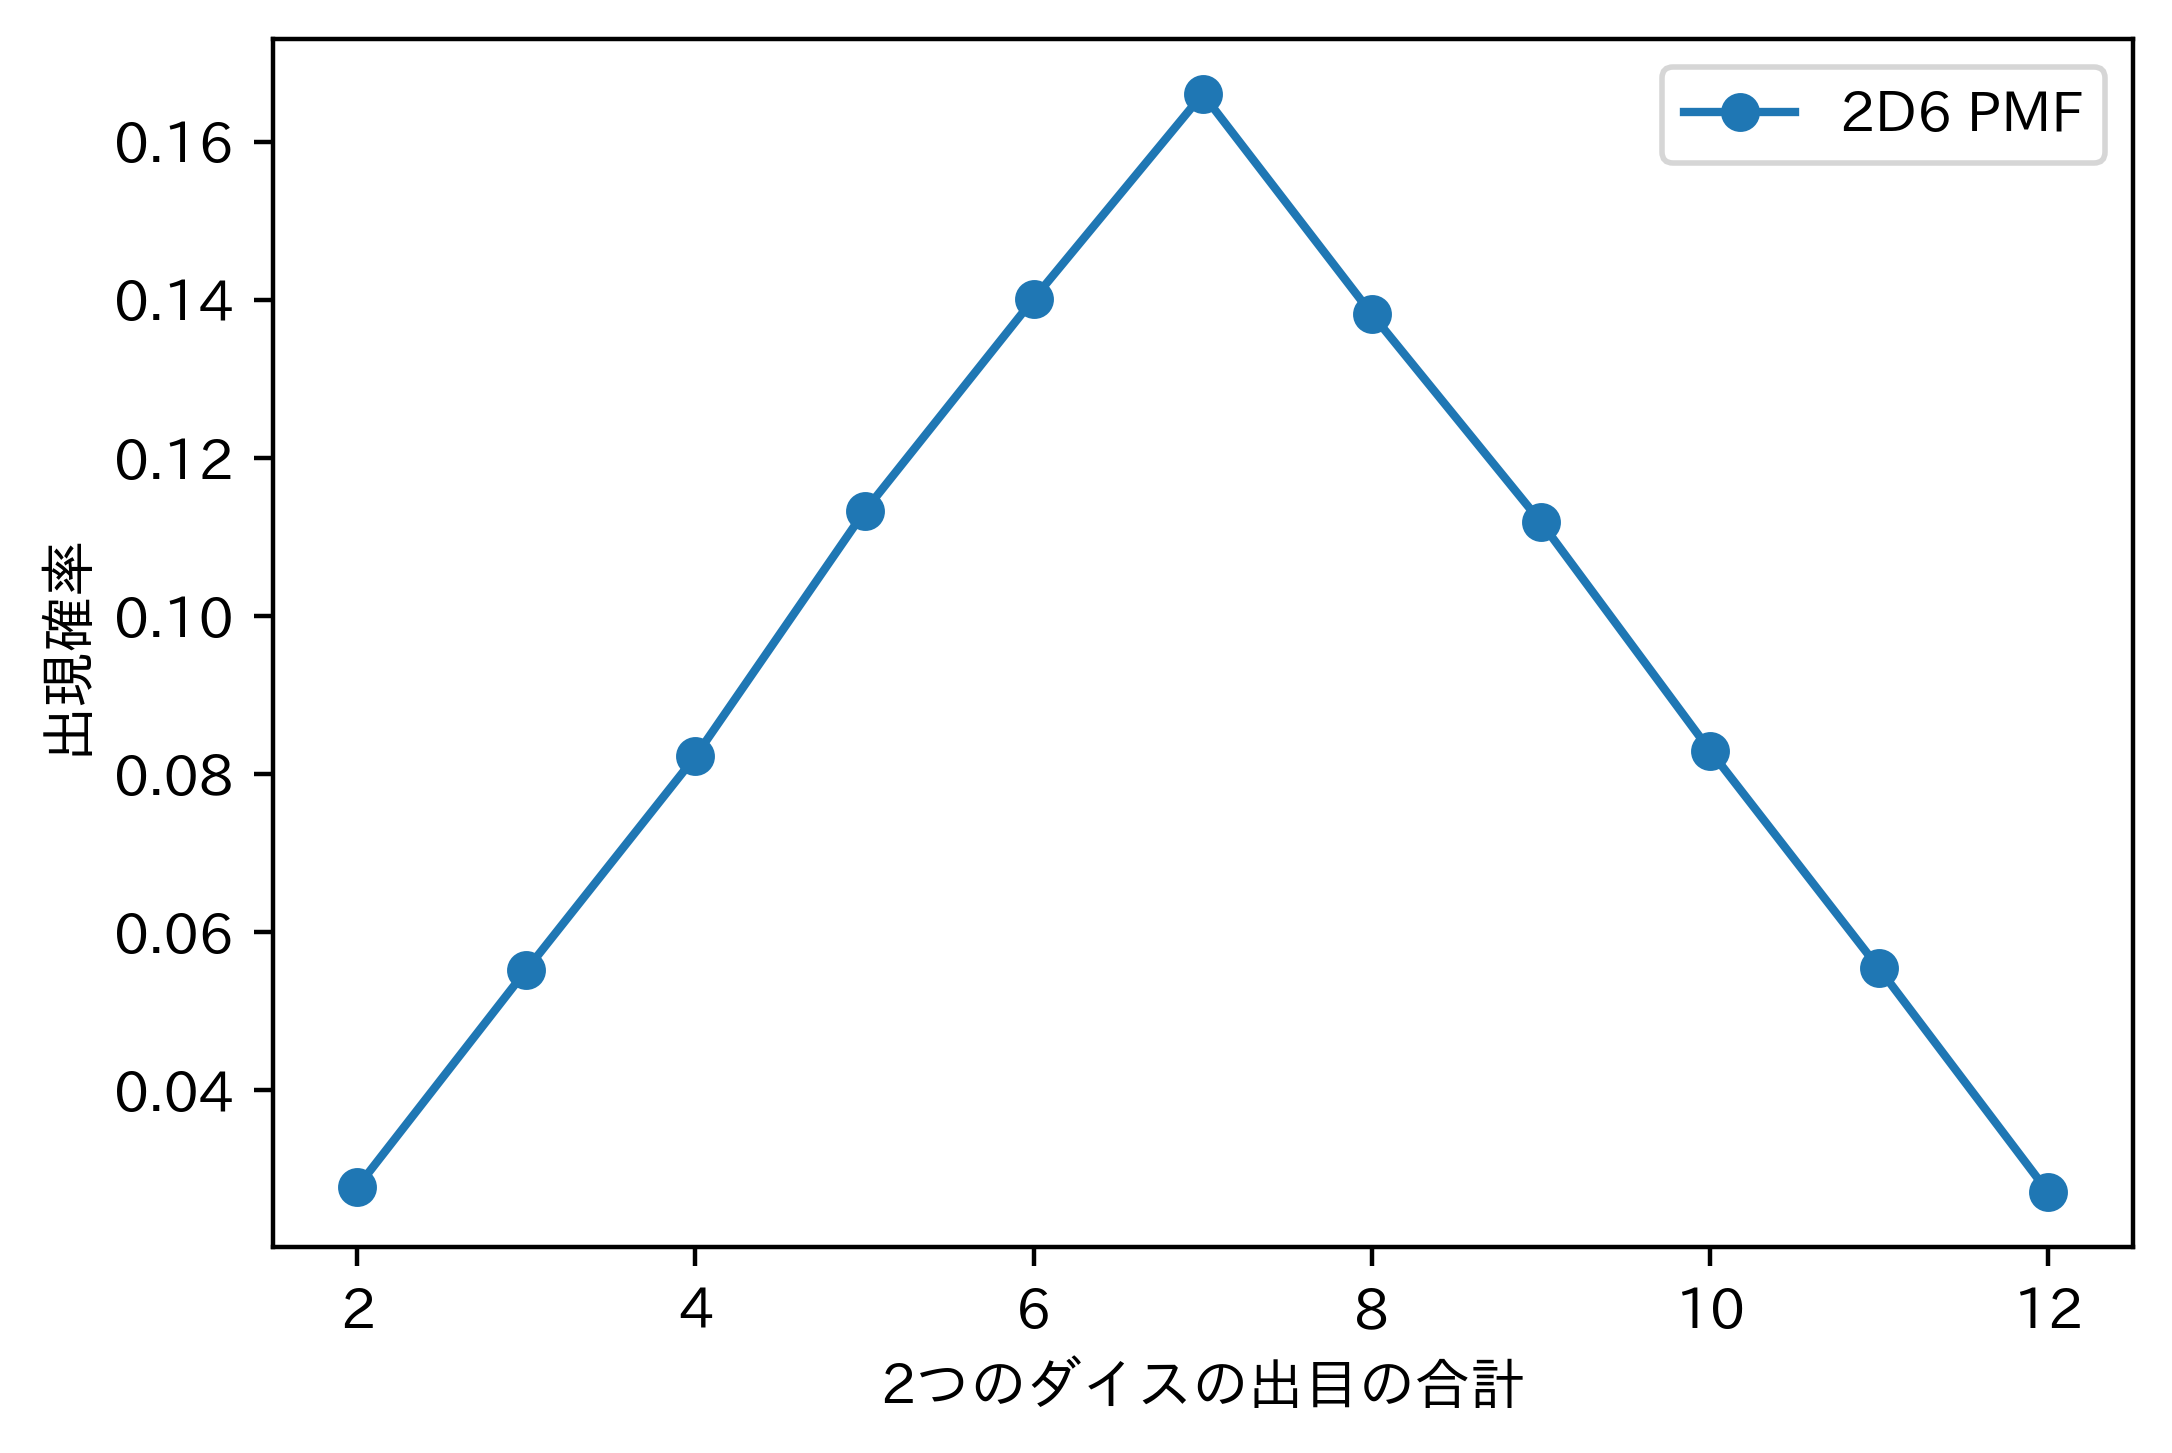

In [2]:
n = 100000
dice_total =  np.random.randint(1,7, size=n)
dice_total += np.random.randint(1,7, size=n)
x, y = np.unique(dice_total, return_counts=True)
y = y / n # カウント値を出現確率に変換
plt.figure(dpi=400)
plt.plot(x, y, marker="o", label="2D6 PMF")
plt.legend()
plt.xlabel("2つのダイスの出目の合計")
plt.ylabel("出現確率")
plt.show()

[0.02774 0.08296 0.16519 0.27842 0.41851 0.58451 0.72268 0.83454 0.9175
 0.9729  1.     ]


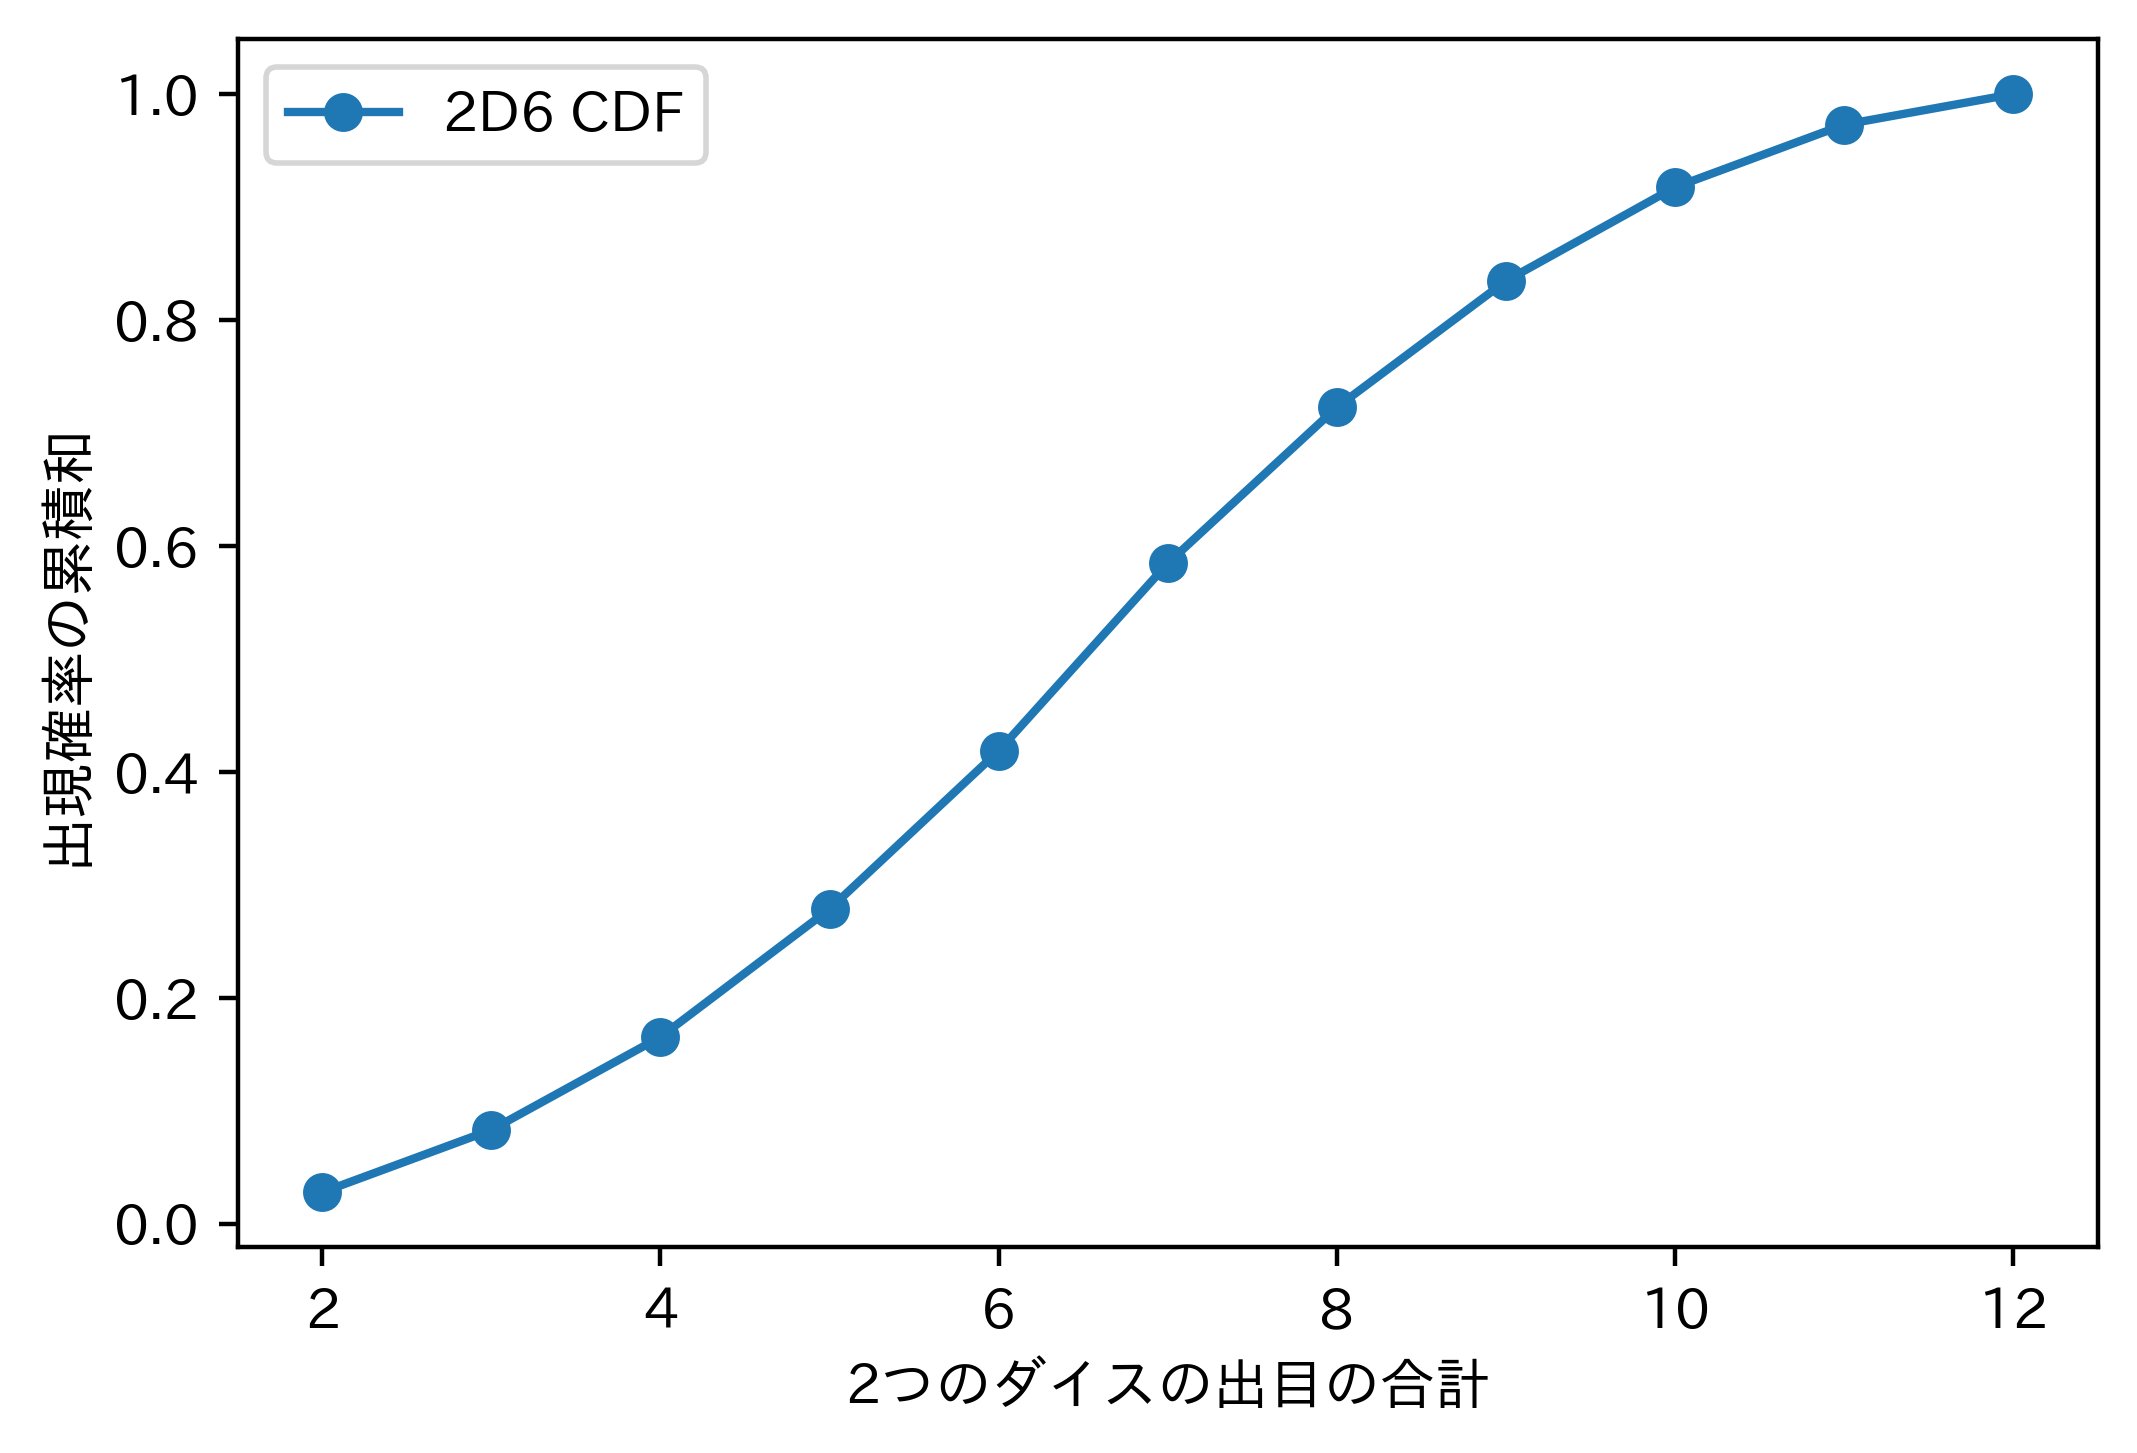

In [3]:
cumsum_y = np.cumsum(y)
print(cumsum_y)
plt.figure(dpi=400)
plt.plot(x, cumsum_y, marker="o", label="2D6 CDF")
plt.legend()
plt.xlabel("2つのダイスの出目の合計")
plt.ylabel("出現確率の累積和")
plt.show()

## 11.3 事後分布の考えた方

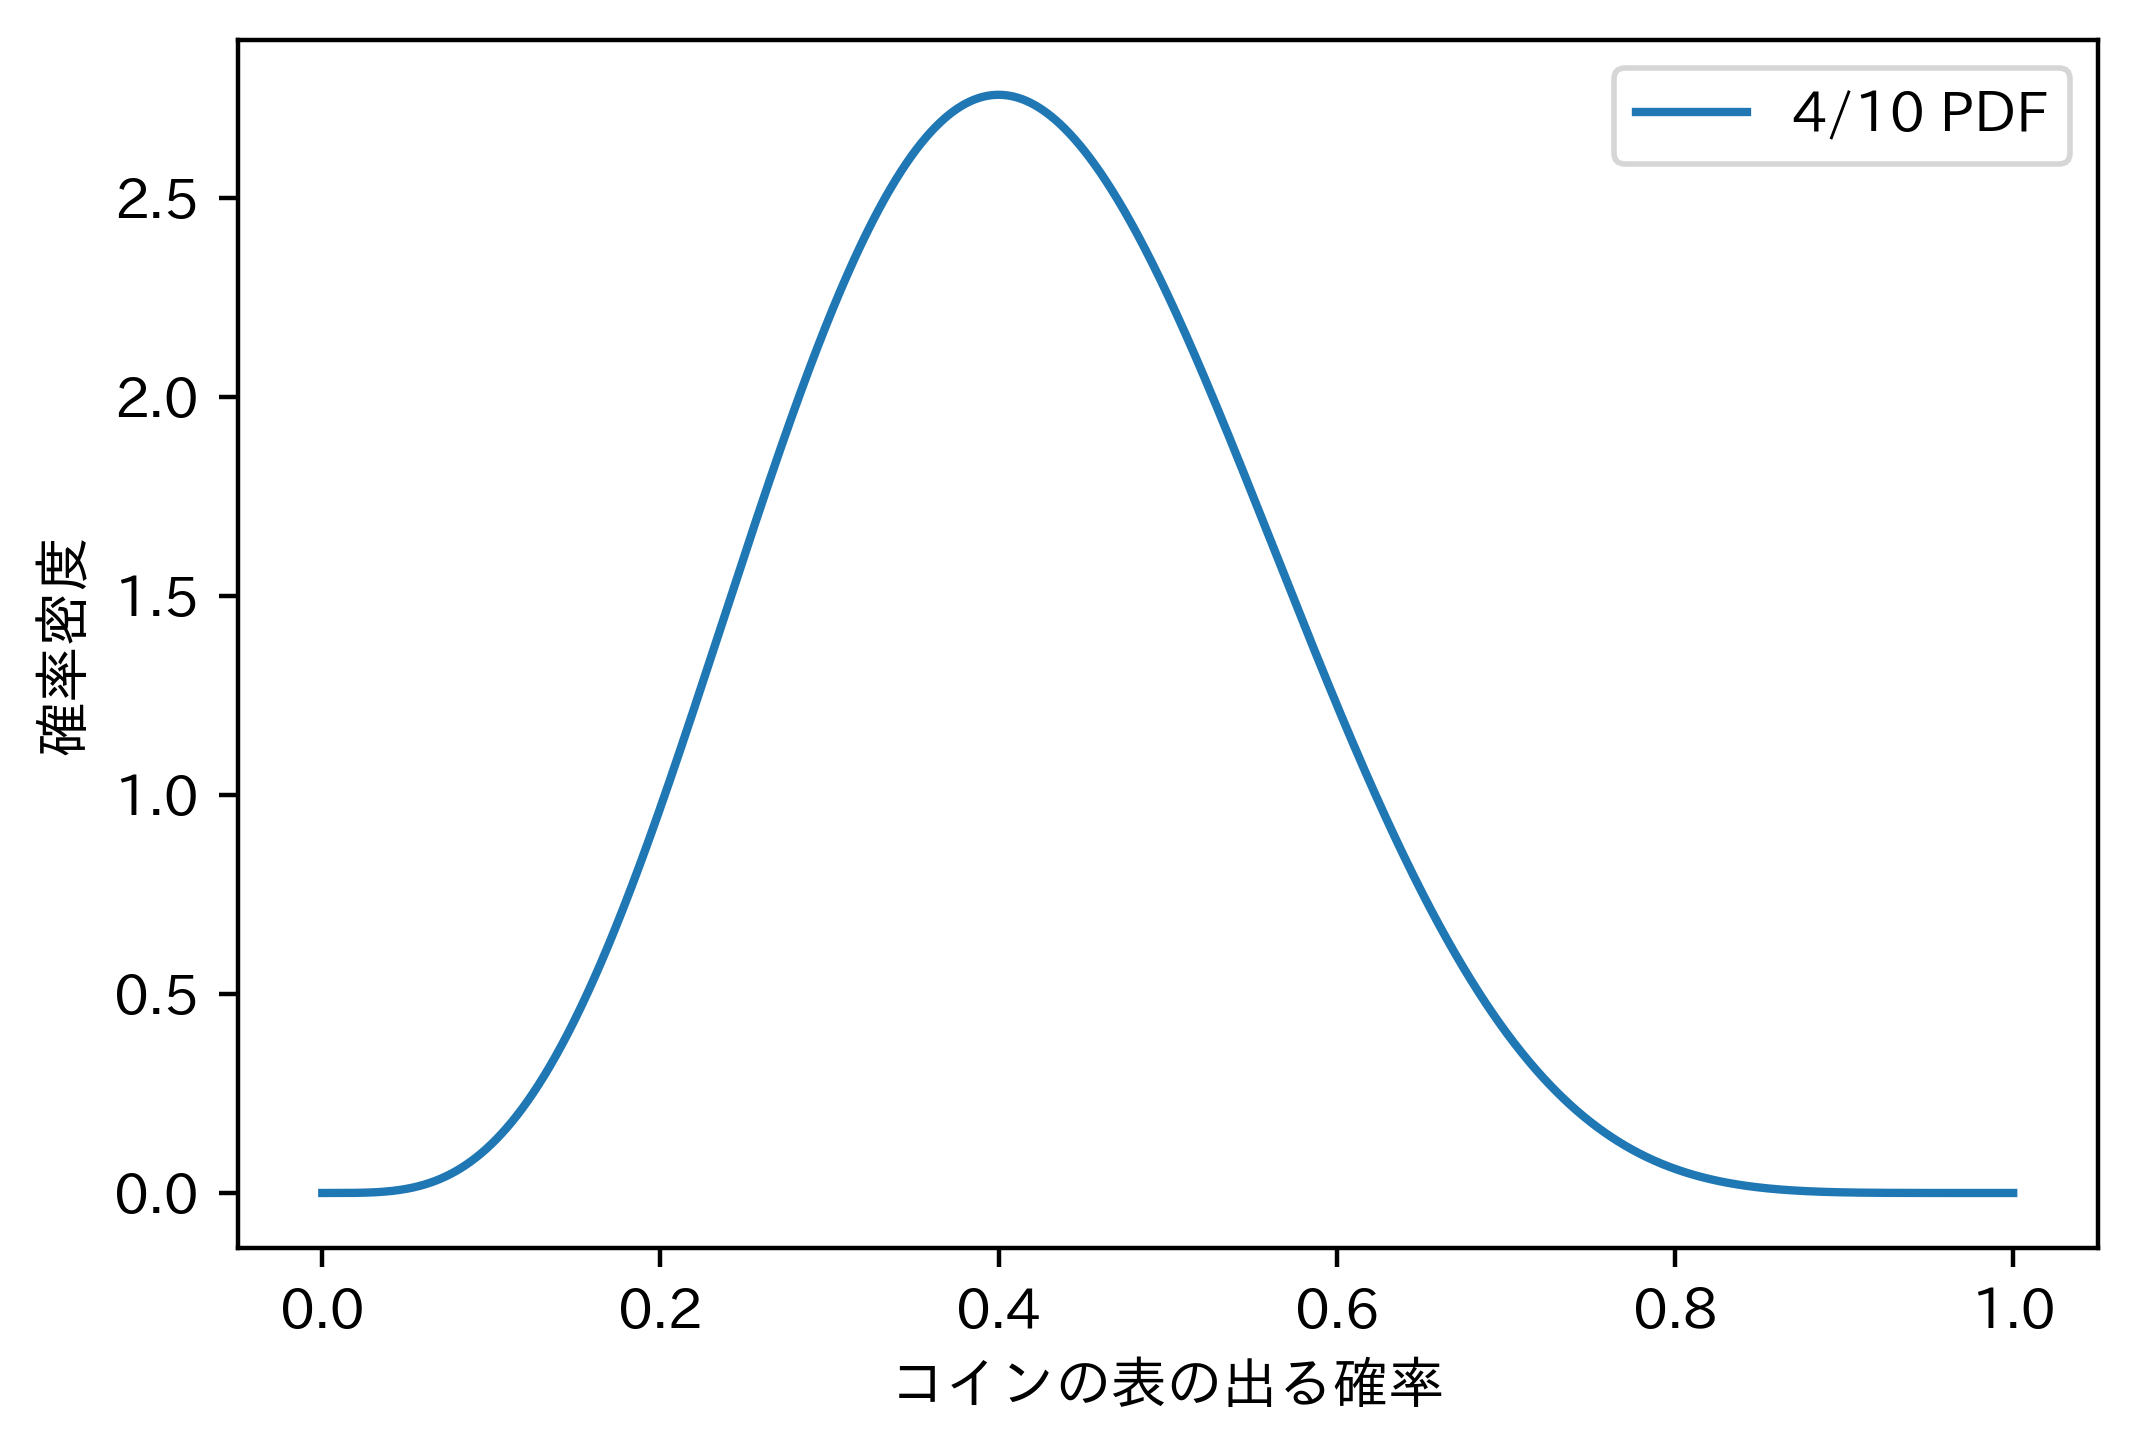

In [4]:
a = 4      # 表が出た回数
b = 10 - a # 裏が出た回数

x = np.linspace(0, 1, 10000)
plt.figure(dpi=400)
plt.plot(x, scipy.stats.beta.pdf(x, a+1, b+1), label="4/10 PDF")
plt.legend()
plt.xlabel("コインの表の出る確率")
plt.ylabel("確率密度")
plt.show()

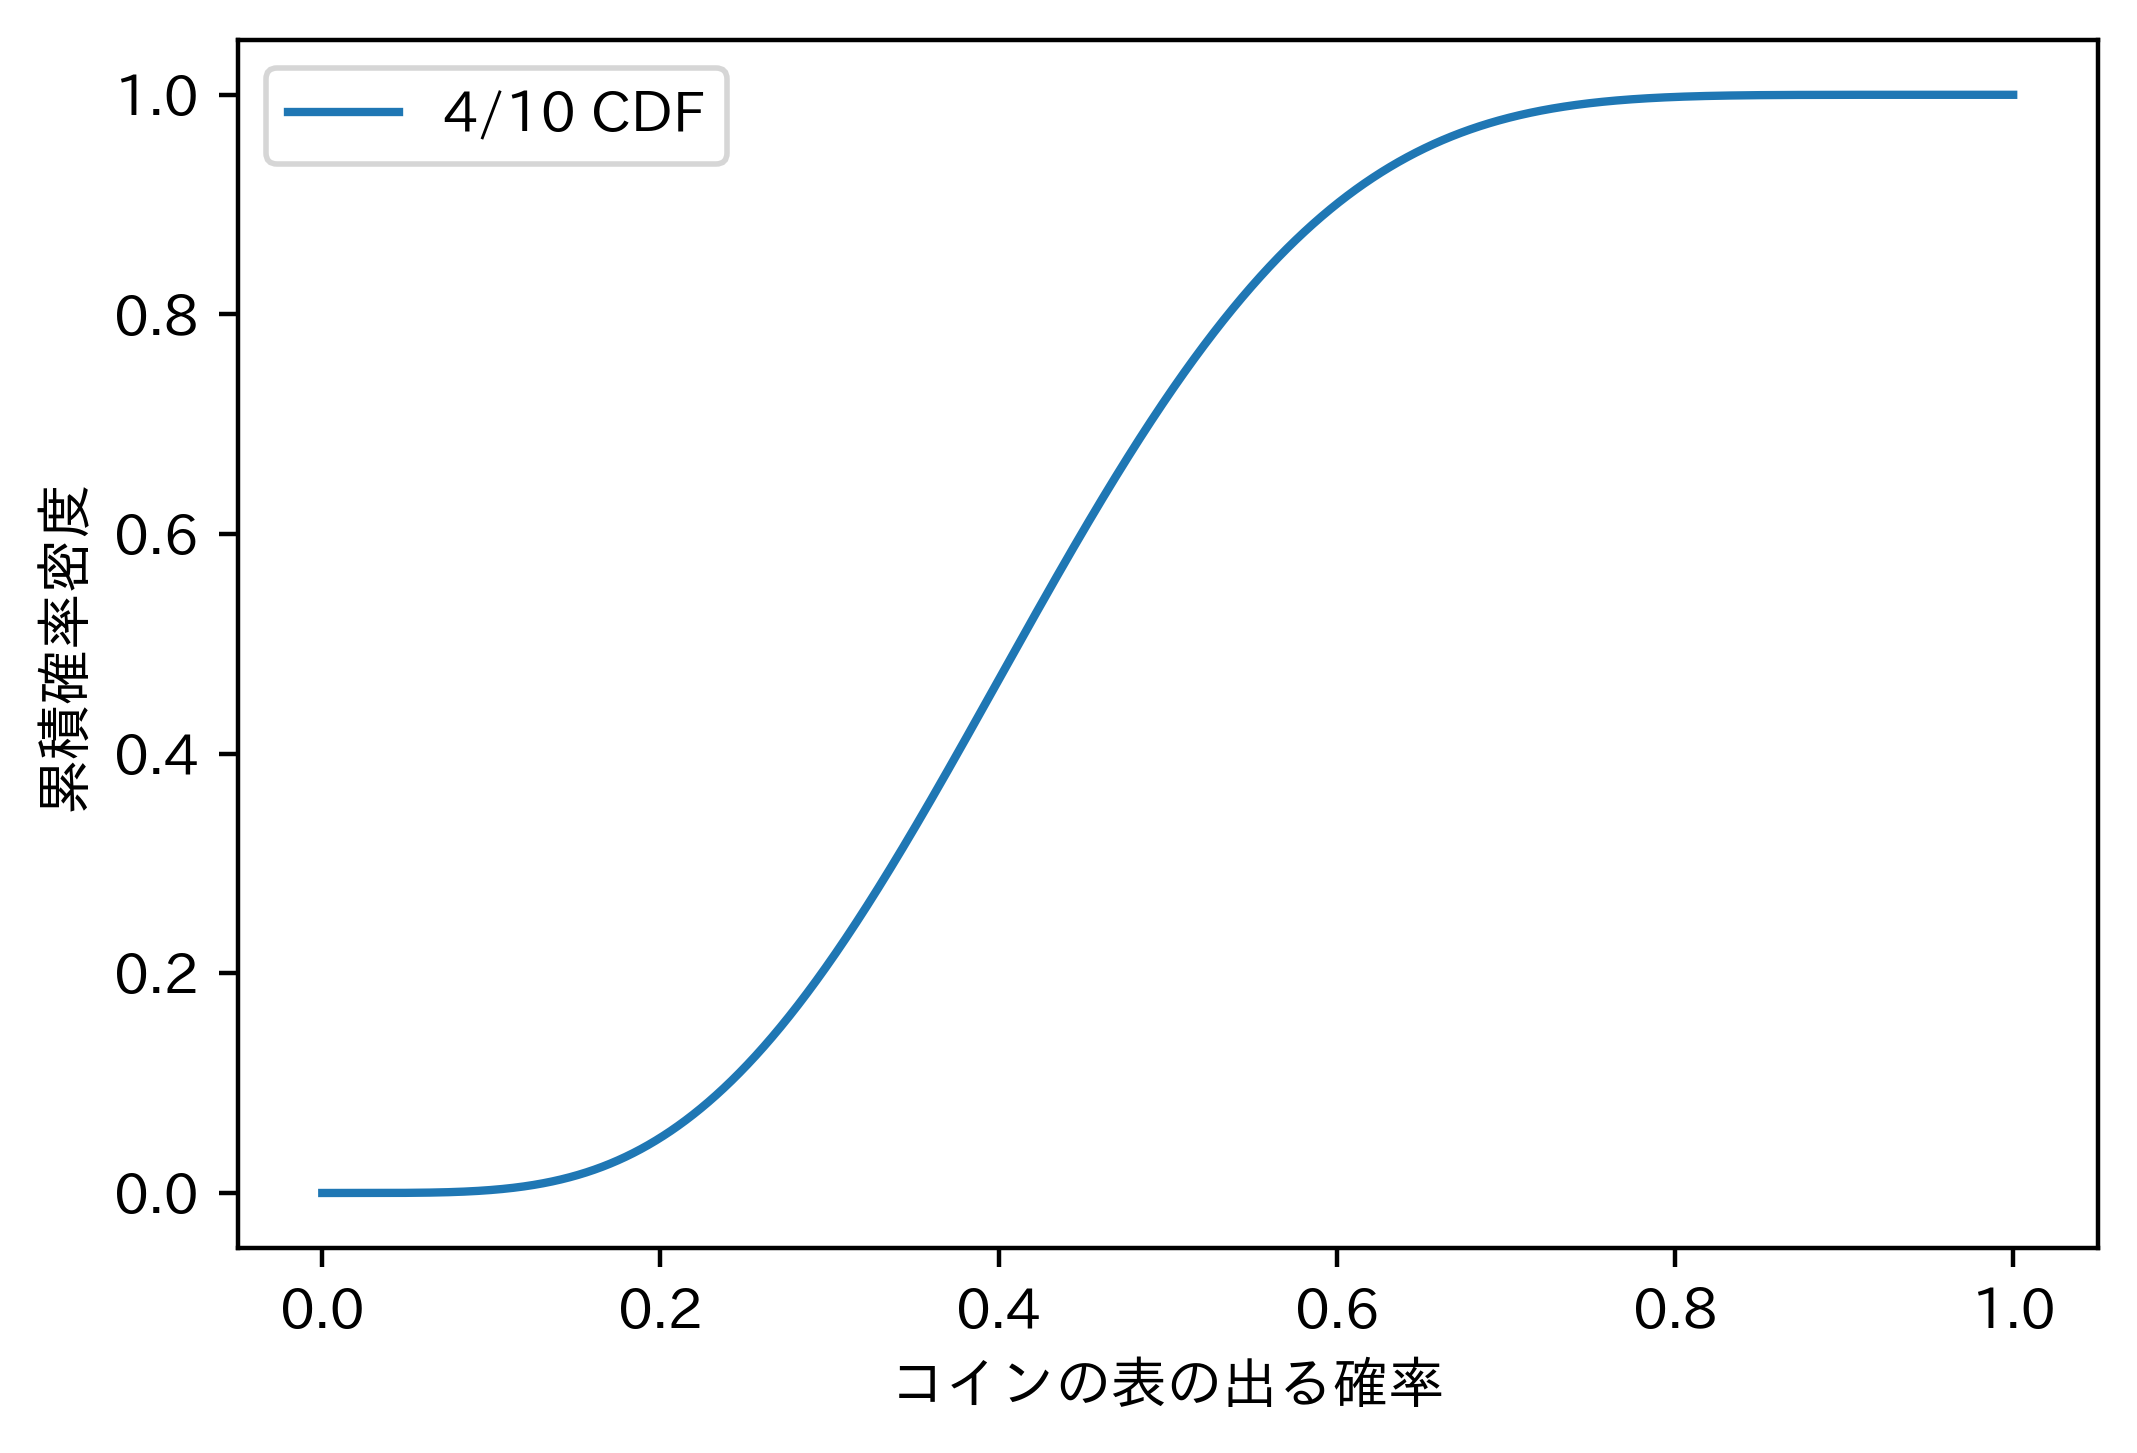

In [5]:
plt.figure(dpi=400)
plt.plot(x, scipy.stats.beta.cdf(x, a+1, b+1), label="4/10 CDF")
plt.legend()
plt.xlabel("コインの表の出る確率")
plt.ylabel("累積確率密度")
plt.show()

In [6]:
print(" 5%", scipy.stats.beta.ppf(0.05, a + 1, b + 1))
print("95%", scipy.stats.beta.ppf(0.95, a + 1, b + 1))
print("90%信用区間", scipy.stats.beta.interval(0.90, a + 1, b + 1))

 5% 0.19957614988383673
95% 0.6501884654280826
90%信用区間 (0.1995761498838367, 0.6501884654280826)


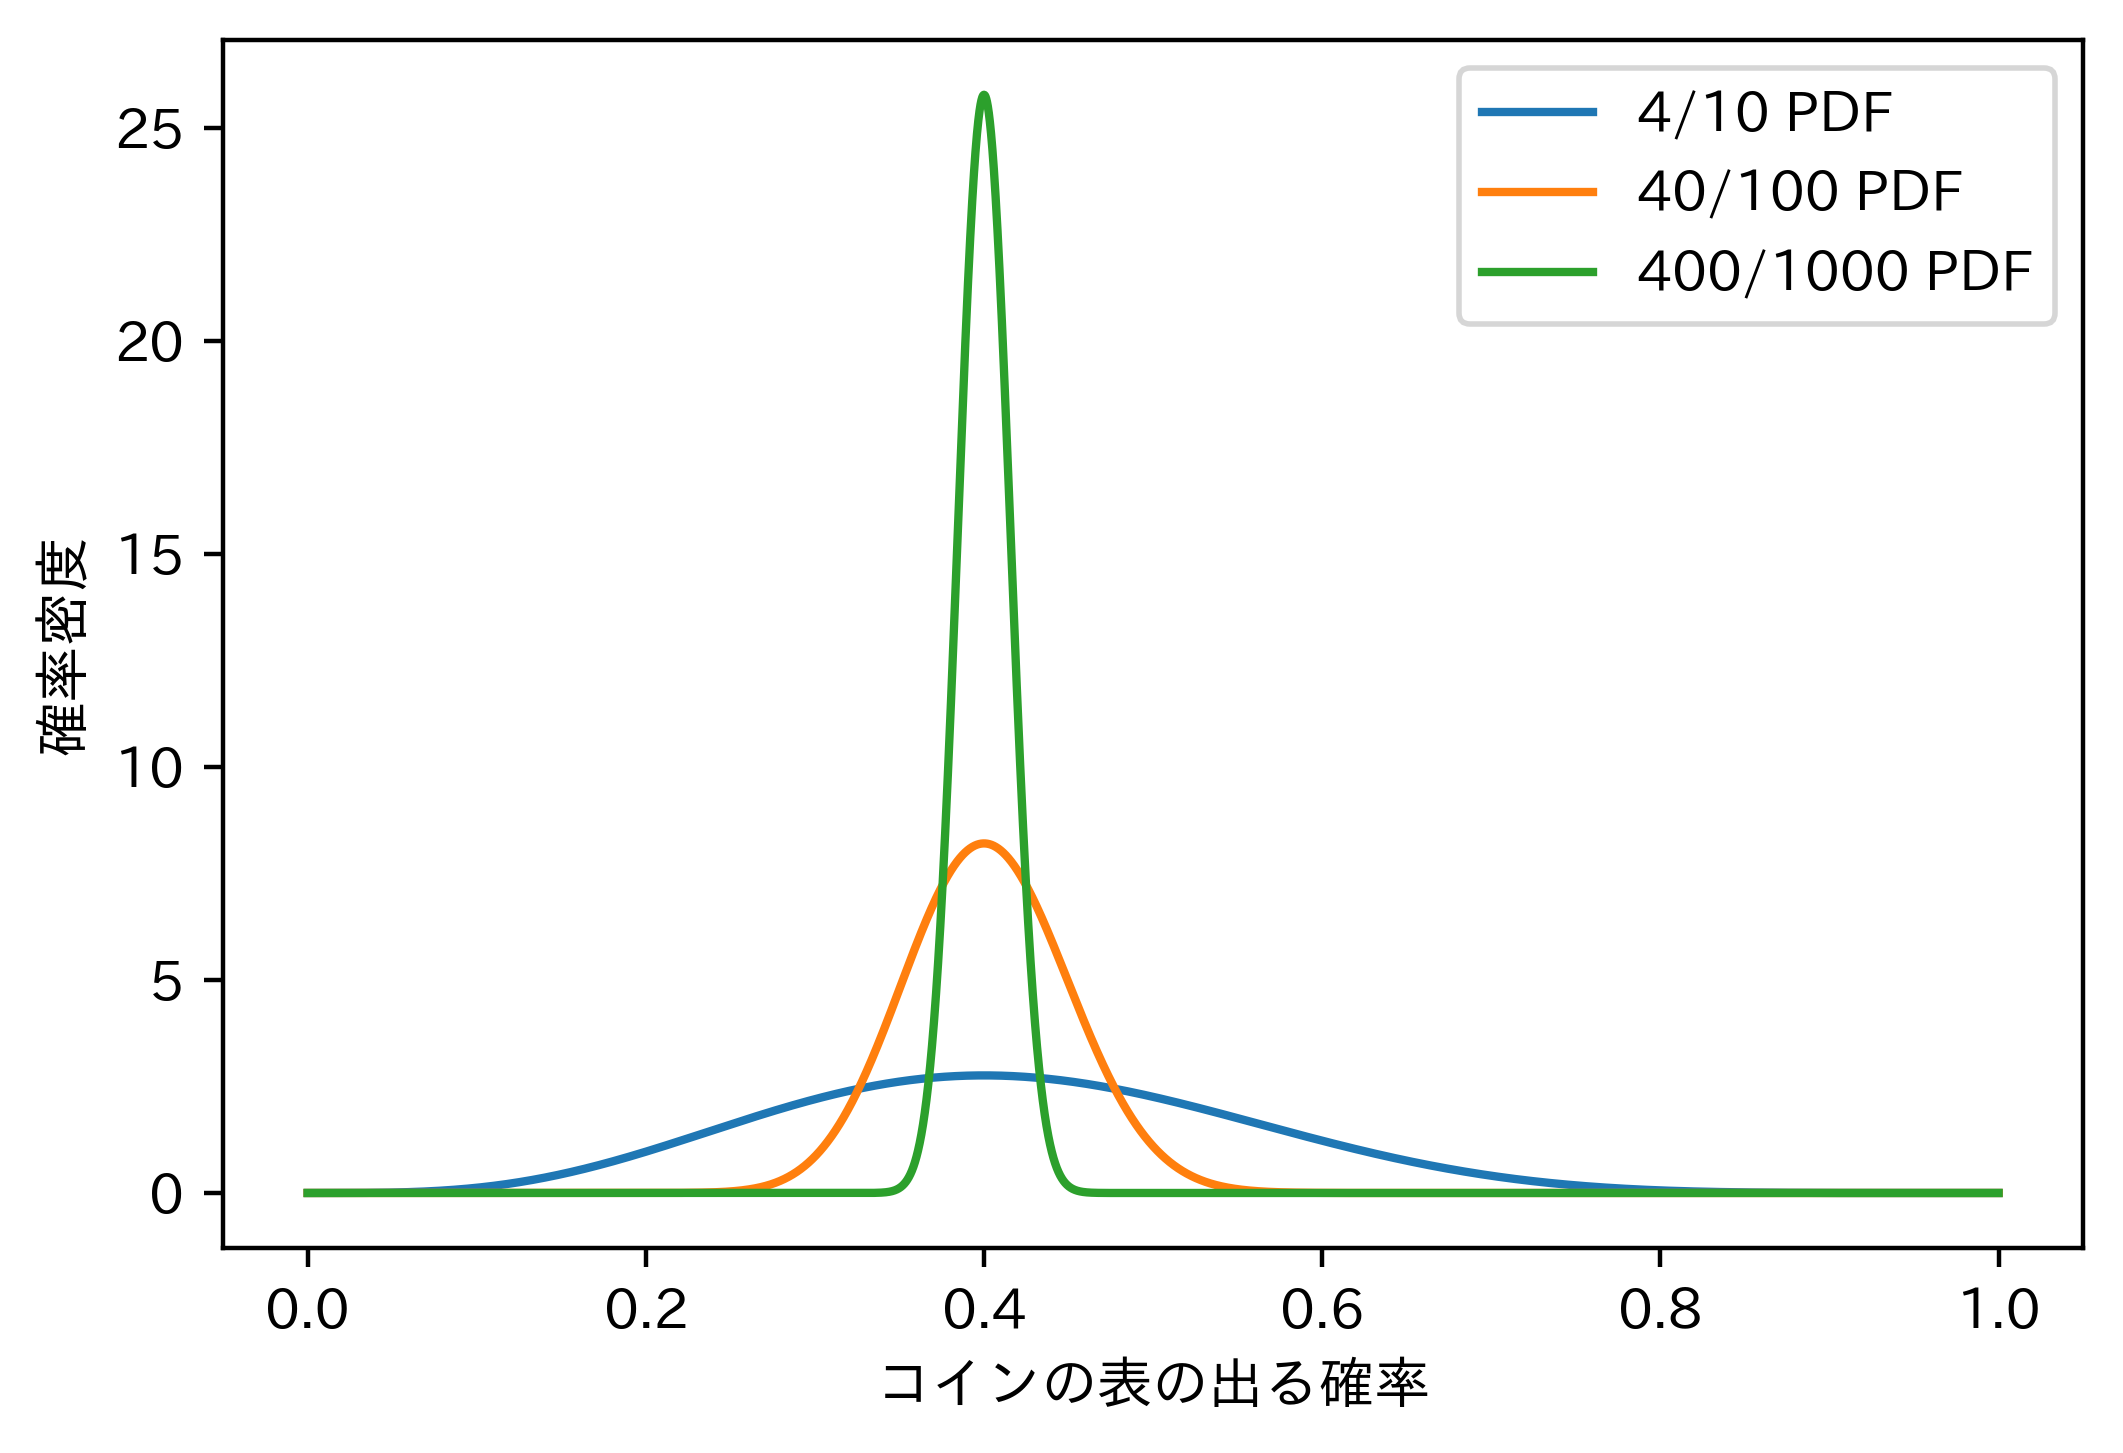

In [7]:
a1 = 4
b1 = 10 - a1
a2 = 40
b2 = 100 - a2
a3 = 400
b3 = 1000 - a3
x = np.linspace(0, 1, 10000)
plt.figure(dpi=400)
plt.plot(x, scipy.stats.beta.pdf(x, a1 + 1, b1 + 1), label="4/10 PDF")
plt.plot(x, scipy.stats.beta.pdf(x, a2 + 1, b2 + 1), label="40/100 PDF")
plt.plot(x, scipy.stats.beta.pdf(x, a3 + 1, b3 + 1), label="400/1000 PDF")
plt.legend()
plt.xlabel("コインの表の出る確率")
plt.ylabel("確率密度")
plt.show()

In [8]:
print("90%信用区間(  4/  10)\t", scipy.stats.beta.interval(0.90, a1 + 1, b1 + 1))
print("90%信用区間( 40/ 100)\t", scipy.stats.beta.interval(0.90, a2 + 1, b2 + 1))
print("90%信用区間(400/1000)\t", scipy.stats.beta.interval(0.90, a3 + 1, b3 + 1))

90%信用区間(  4/  10)	 (0.1995761498838367, 0.6501884654280826)
90%信用区間( 40/ 100)	 (0.32355743256469754, 0.48256117185206715)
90%信用区間(400/1000)	 (0.37486561630199944, 0.42576020414058036)


## 11.4 事後分布の信用区間上限を用いた実装例

[]

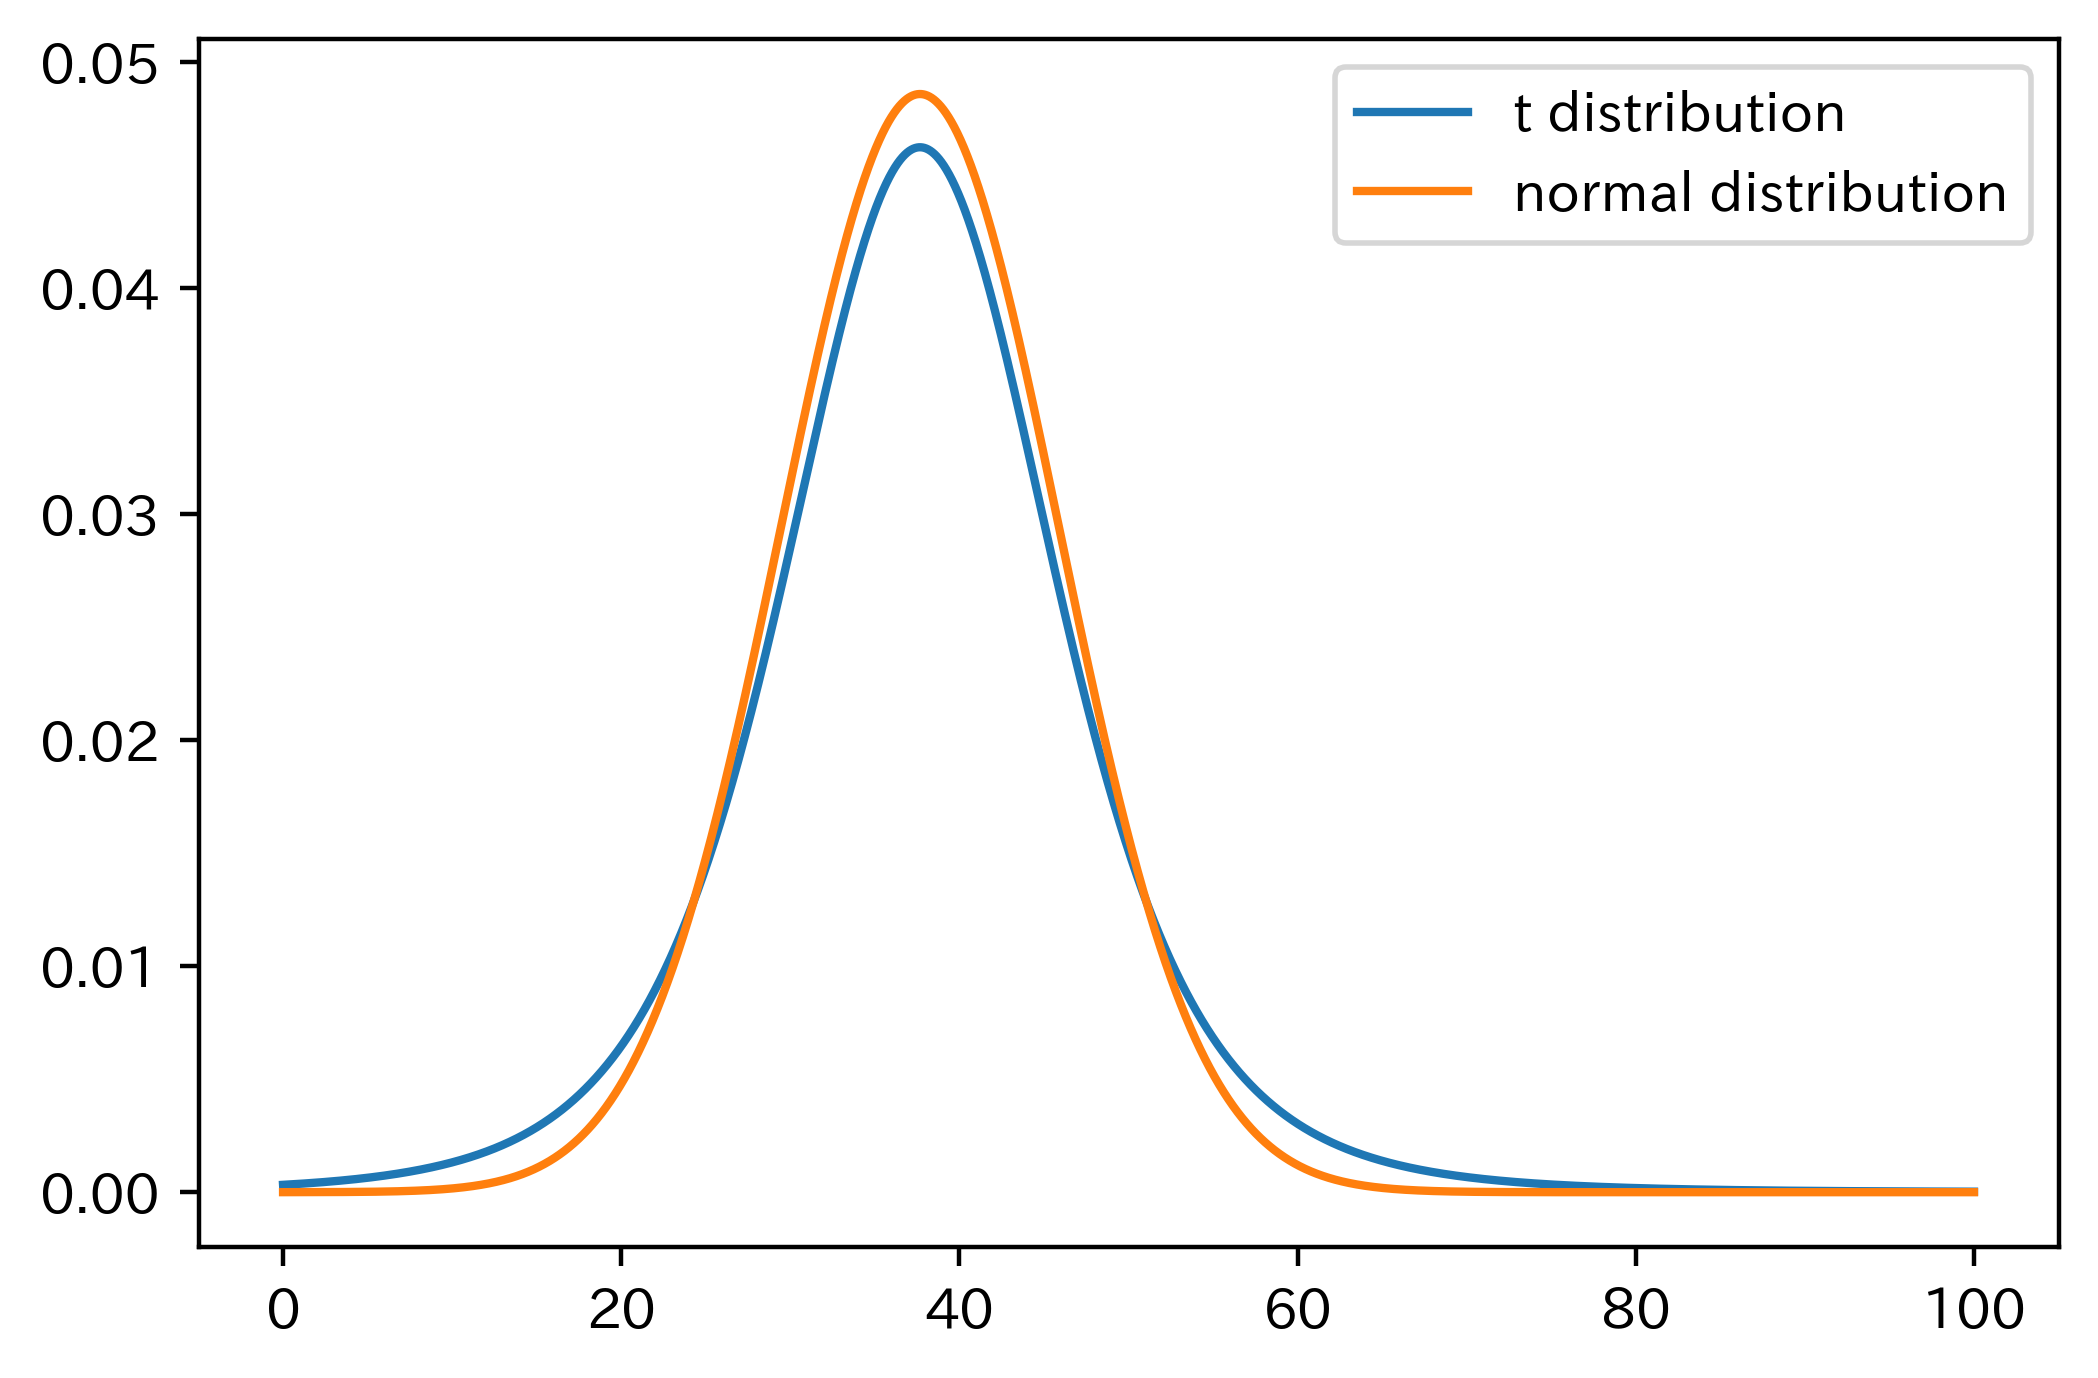

In [9]:
# https://hira03.hatenablog.com/entry/statistics_interval_estimation_of_population_mean_unknown

data = [32, 12, 20, 42, 61, 59] # 標本
n = len(data) # サンプルサイズ
mean = np.mean(data) # 標本平均
se = np.std(data, ddof=1) / (n ** 0.5) #標準誤差
dof = n - 1 # 自由度
x = np.linspace(0, 100, 10000)
plt.figure(dpi=400)
plt.plot(x, scipy.stats.t.pdf(x, loc=mean, scale=se, df=dof), label="t distribution")
plt.plot(x, scipy.stats.norm.pdf(x, loc=mean, scale=se), label="normal distribution")
plt.legend()
plt.plot()

Text(0, 0.5, '確率密度')

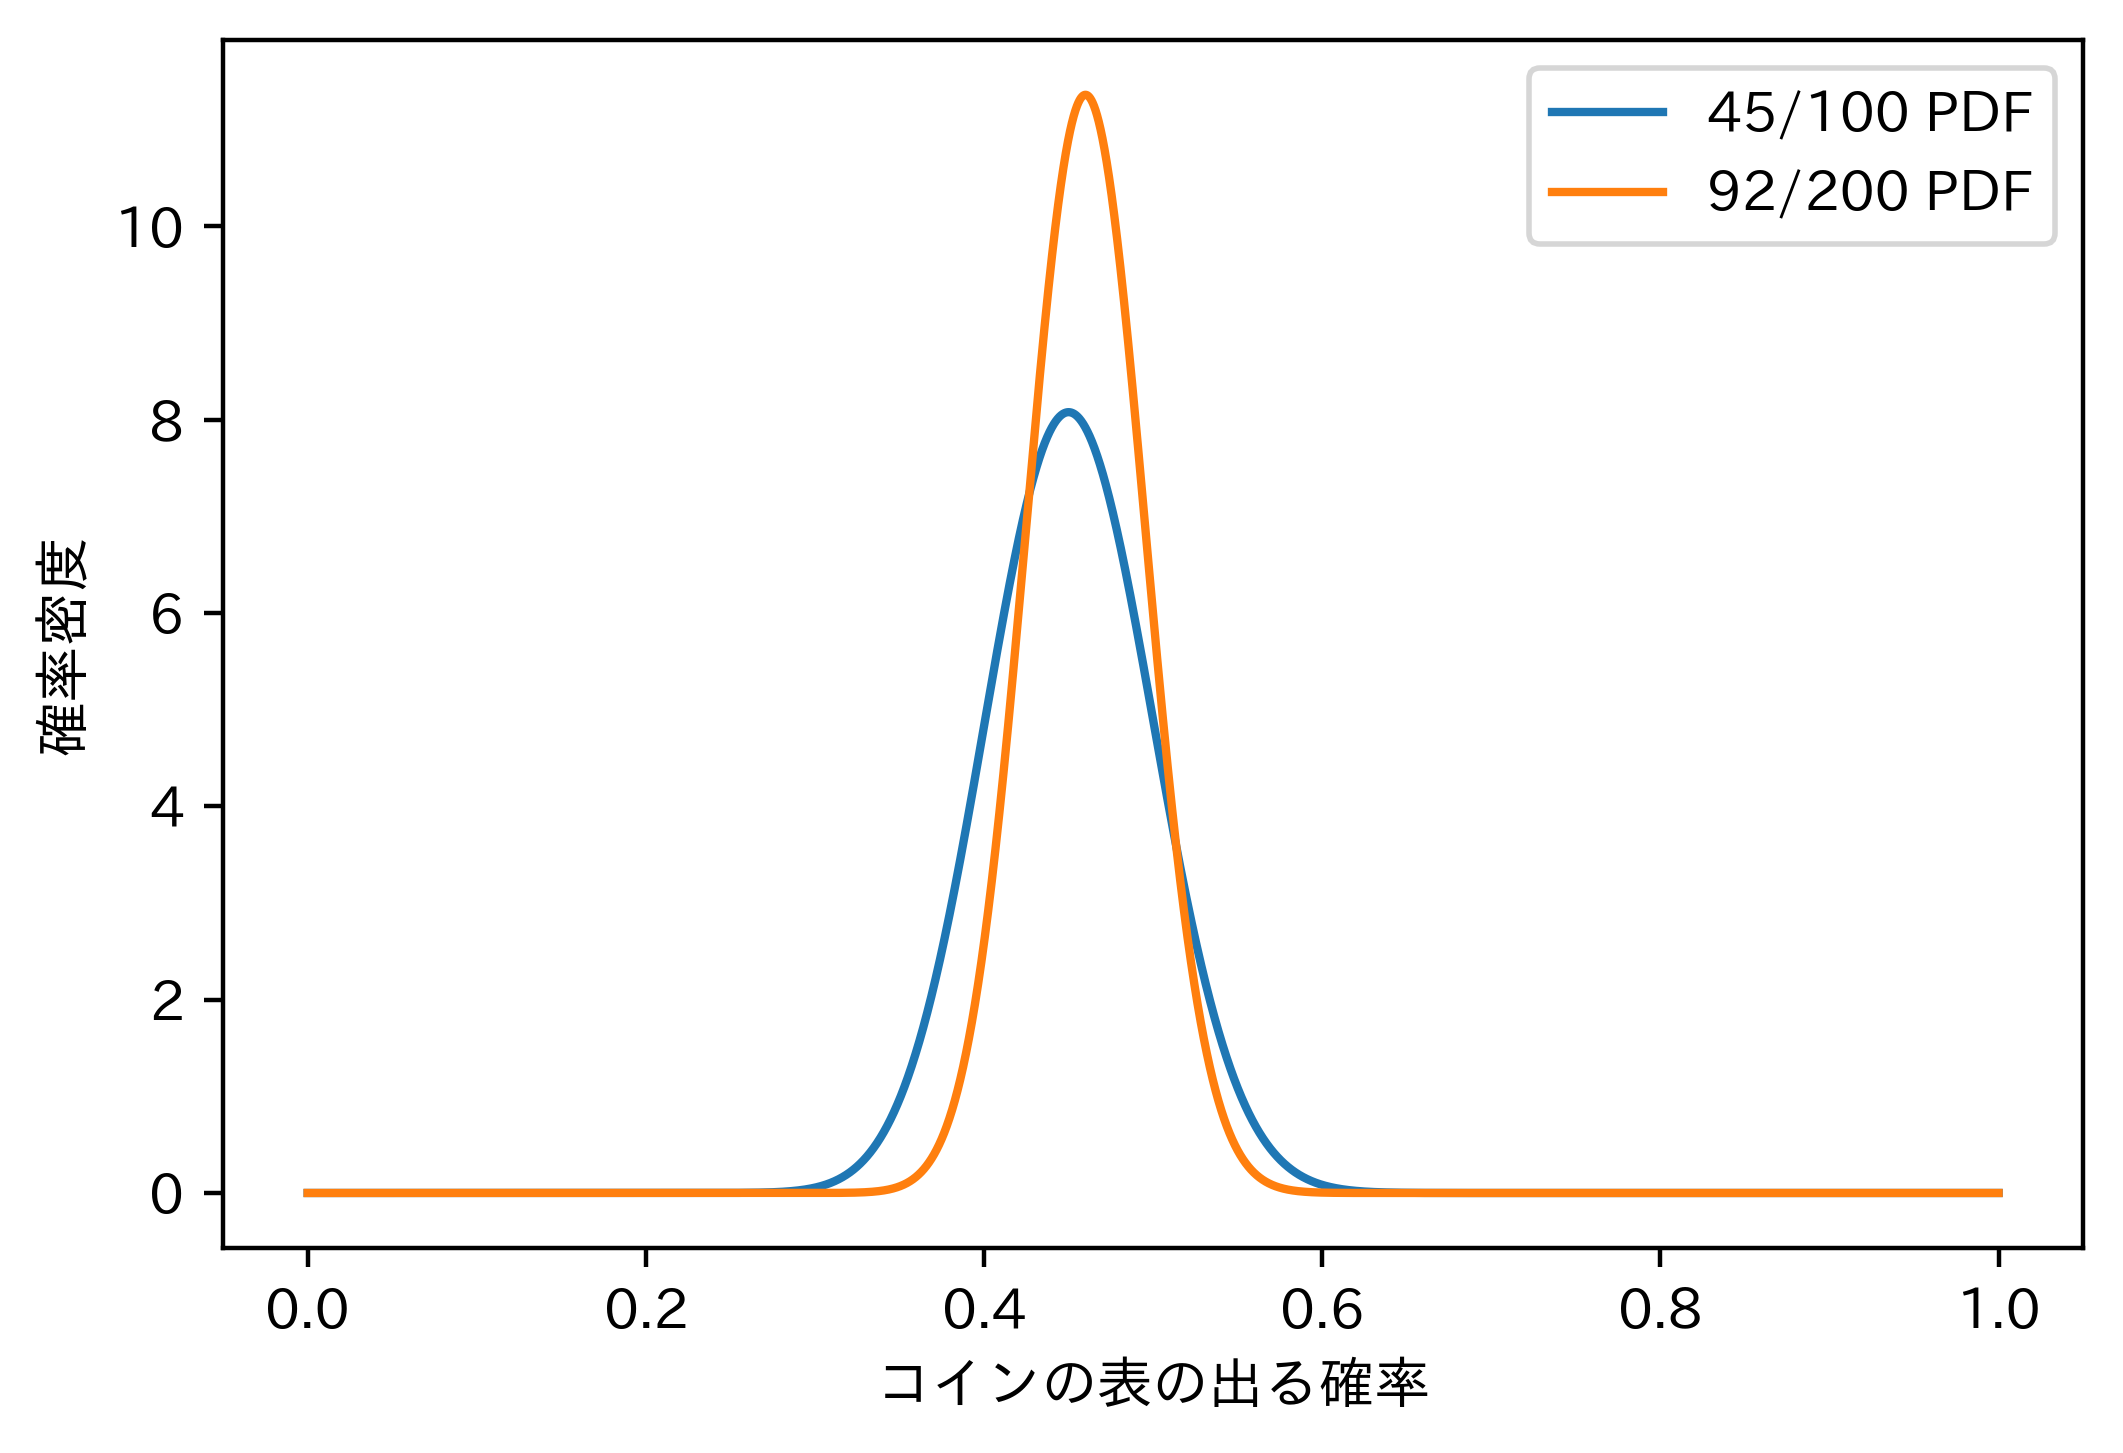

In [10]:
a1 = 45
b1 = 100 - a1
a2 = 92
b2 = 200 - a2
x = np.linspace(0, 1, 10000)
plt.figure(dpi=400)
plt.plot(x, scipy.stats.beta.pdf(x, a1+1, b1+1), label="45/100 PDF")
plt.plot(x, scipy.stats.beta.pdf(x, a2+1, b2+1), label="92/200 PDF")
plt.legend()
plt.xlabel("コインの表の出る確率")
plt.ylabel("確率密度")

In [11]:
print("CoinA:", scipy.stats.beta.ppf(0.95, a1 + 1, b1 + 1))
print("CoinB:", scipy.stats.beta.ppf(0.95, a2 + 1, b2 + 1))


CoinA: 0.5322261940040164
CoinB: 0.5181806676164464


In [12]:
np.argmax(scipy.stats.beta.ppf(0.95, [a1 + 1, a2 + 1], [b1 + 1, b2 + 1]))

0

## 11.5 UCB1

In [13]:
a1 = 45
b1 = 100 - a1
a2 = 92
b2 = 200 - a2

print("CoinA:", a1/(a1+b1) + (2 * np.log(a1+b1+a2+b2) / (a1+b1)) ** 0.5)
print("CoinB:", a2/(a2+b2) + (2 * np.log(a1+b1+a2+b2) / (a2+b2)) ** 0.5)

CoinA: 0.7877508689746393
CoinB: 0.6988259298036166


## 11.6.1 Softmax法

In [14]:
def softmax(x, t):
    return np.exp(x / t)/ np.sum(np.exp(x / t))

conversion_rate = np.array([0.12, 0.11, 0.10])
select_rate = softmax(conversion_rate, 0.01)
print(select_rate)

[0.66524096 0.24472847 0.09003057]


In [15]:
np.random.choice(len(select_rate), size=20, p=select_rate)

array([0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [16]:
select_rate = softmax(conversion_rate, 100)
print(select_rate)

[0.33336667 0.33333333 0.3333    ]


## 11.6.2 トンプソンサンプリング法

In [17]:
a = 40
b = 100 - a
print(scipy.stats.beta.rvs(a + 1, b + 1, size=3))
print(np.random.beta(a + 1, b + 1, size=3))

[0.36959808 0.37634539 0.39659041]
[0.38919497 0.42589029 0.43531427]


In [18]:
a1 = 45
b1 = 100 - a1
a2 = 92
b2 = 200 - a2
coin_a_dist = scipy.stats.beta.rvs(a1 + 1, b1 + 1, size=3)
coin_b_dist = scipy.stats.beta.rvs(a2 + 1, b2 + 1, size=3)
print("CoinA:", coin_a_dist)
print("CoinB:", coin_b_dist)
print("CoinA>CoinB", coin_a_dist > coin_b_dist)

CoinA: [0.47207349 0.3611721  0.525901  ]
CoinB: [0.46205428 0.48804478 0.47091127]
CoinA>CoinB [ True False  True]


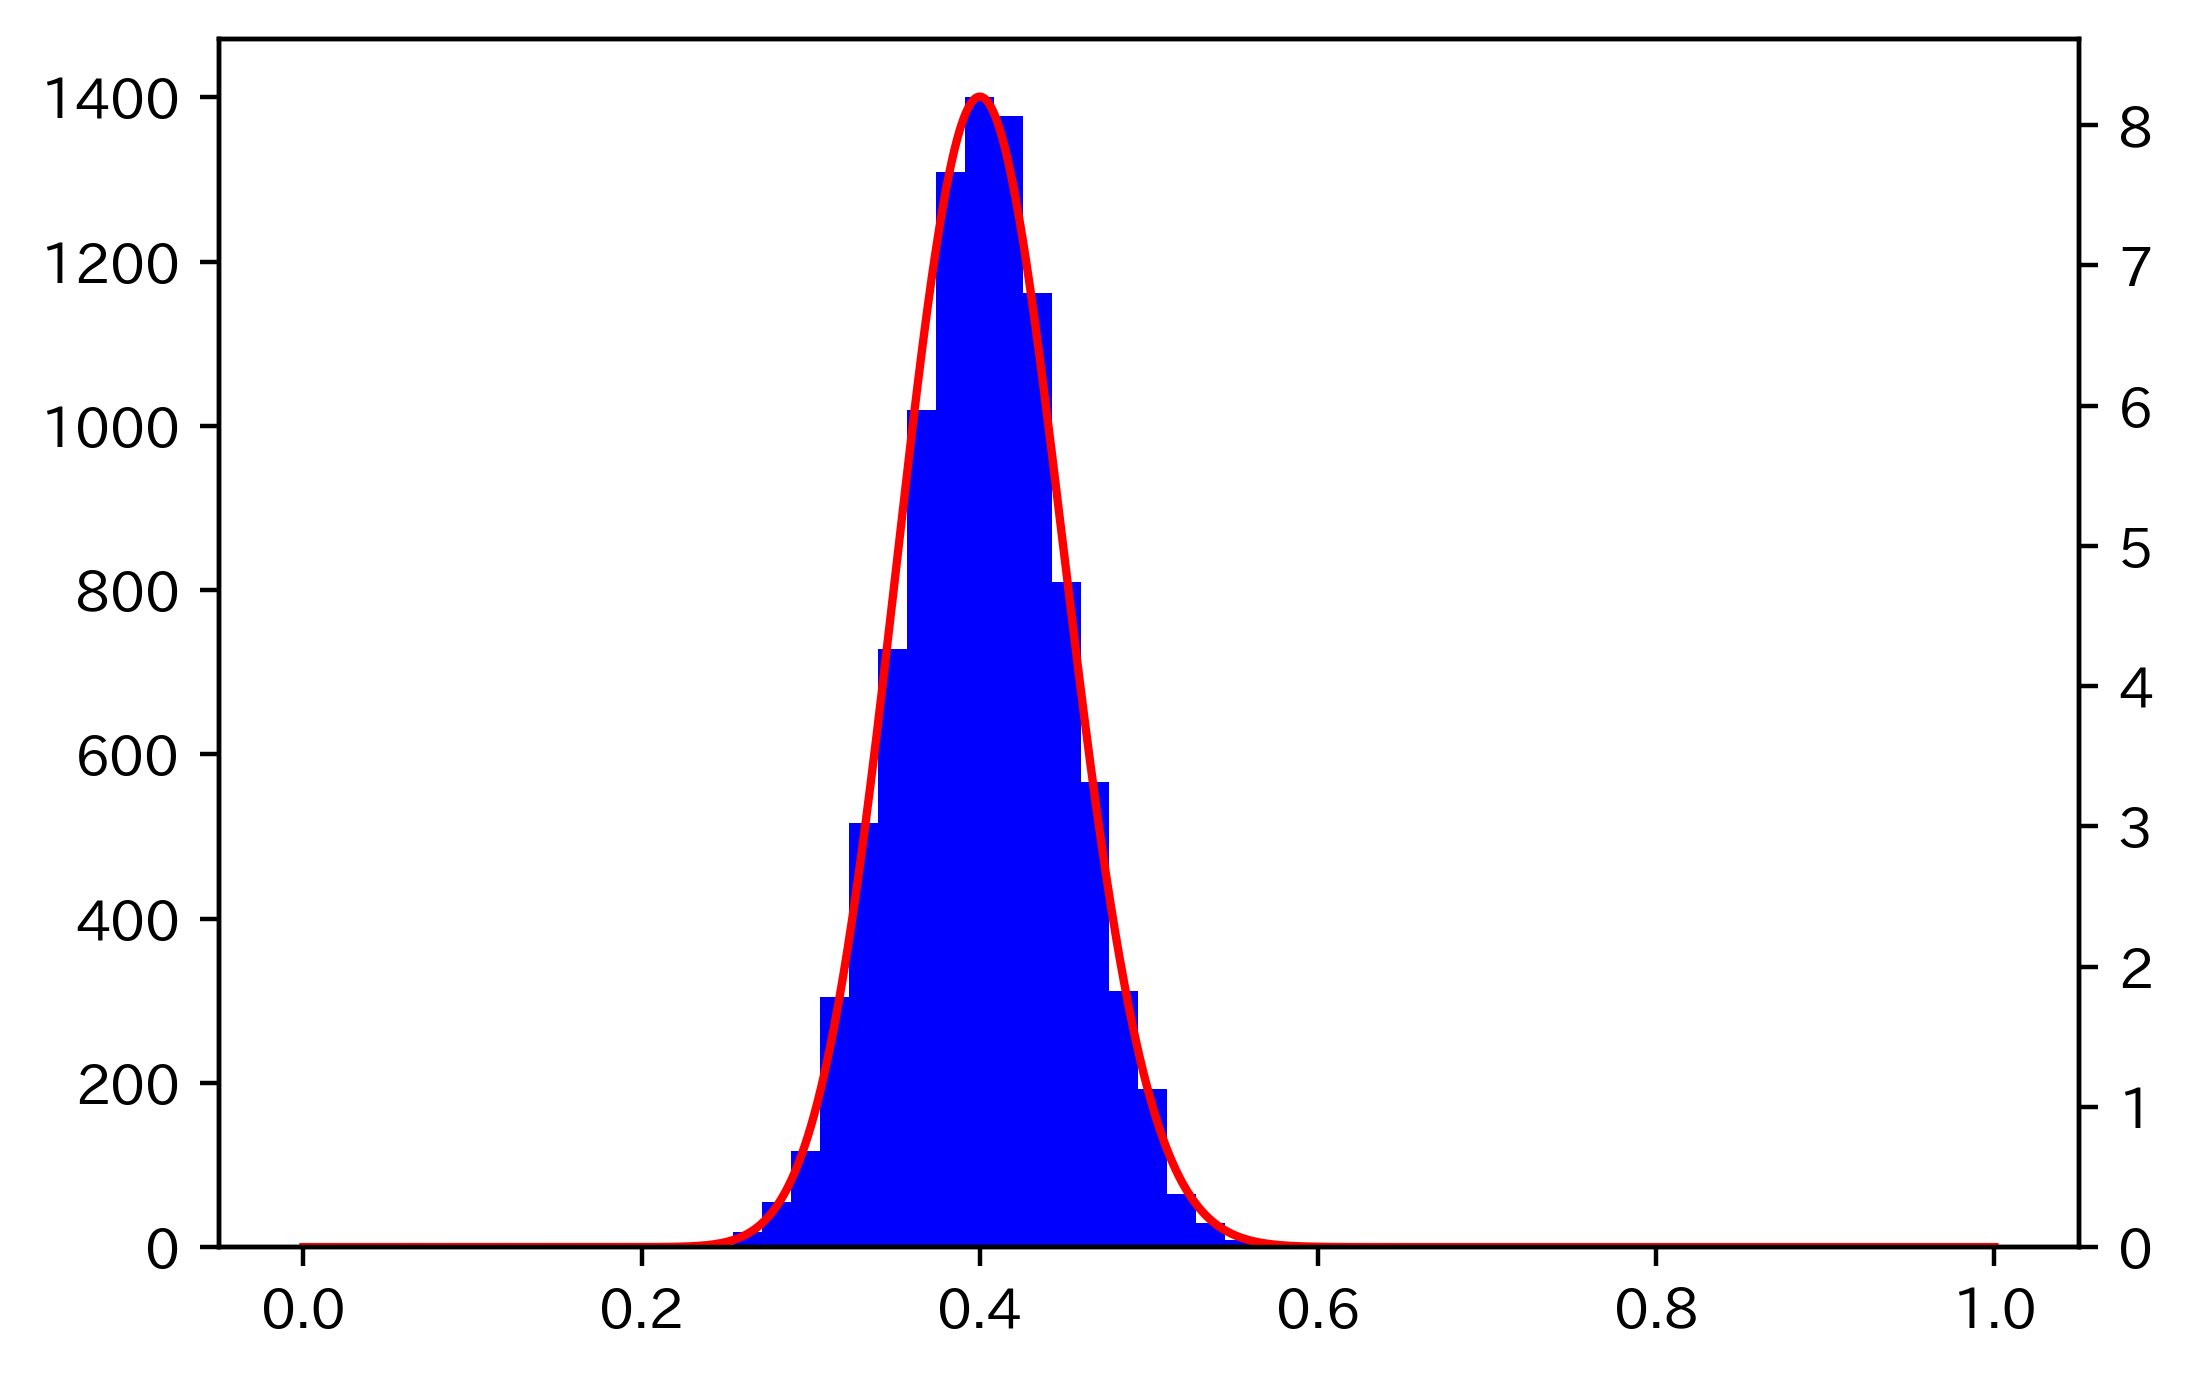

In [19]:
a = 40
b = 100 - a
x = np.linspace(0, 1, 10000)

fig, ax1 = plt.subplots(dpi=400)
ax2 = ax1.twinx()

# beta分布から乱数を10000個生成して、ヒストグラムにして描画
ax1.hist(scipy.stats.beta.rvs(a + 1, b + 1, size=10000), bins=20, color="blue", label="beta histgram")

# beta分布の確率密度関数を描画する
ax2.plot(x, scipy.stats.beta.pdf(x, a + 1, b + 1), color="red", label="beta PDF")
ax2.set_ylim(0,)

plt.show()

In [23]:
a1 = 45
b1 = 100 - a1
a2 = 92
b2 = 200 - a2
n = 10000
thompson_sampling_score = np.random.beta([a1 + 1, a2 + 1], [b1 + 1, b2 + 1], size=(n, 2))
selected_arm = np.argmax(thompson_sampling_score, axis=1)
arm_choice_rate = np.bincount(selected_arm) / n
arm_choice_rate

array([0.4355, 0.5645])